## Hydrogen abstraction of methane by chlorine atoms: microkinetic simulation

Simulate a microkinetics system using calculated reaction rate constants.

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import overreact as rx
from overreact import constants
from overreact import datasets

sns.set(style="white", context="notebook", palette="colorblind", font_scale=1.1)

In [2]:
temperature = 298.15
# basisset = "6-311G(2df,2pd)"  # 6-311G(2df,2p) best predicts activation enthalpy
basisset = 'cc-pVTZ'  # ΔH‡(T=1) = 4.20 kcal/mol (closest to Tanaka's result, 4.08 kcal/mol)

model = rx.parse_model(
    os.path.join(datasets.data_path, f"tanaka1996/UMP2/{basisset}/model.k")
)
k_eck = rx.get_k(
    model.scheme, model.compounds, temperature=temperature, scale="M-1 s-1"
)

# October 2020 estimates (in ppb) for CH4 from https://esrl.noaa.gov/gmd/ccgg/trends_ch4/
# y0_CH4 = 1890.9 * 1e-6 / np.sum(model.compounds["CH4"].atommasses)

# Cl· estimate: 1.3e4 molecules / cm^-3 (doi:10.1038/srep36821)
# y0_Cl = 1.3e4 * 1e-3 / constants.N_A

# Estimate (in ppb) for HCl from doi:10.1002/2013JD020992
# y0_HCl = 1.3 * 1e-6 / np.sum(model.compounds["HCl"].atommasses)

# Approximately within experimental conditions of doi:10.1021/jp0257909
# y0_Cl = 9e10 * 1e-3 / constants.N_A
# y0_CH4 = 39 * y0_Cl
# y0_HCl = 0.00

y0_Cl = 0.1e-6
y0_CH4 = 2.5 * y0_Cl
y0_HCl = 0.25 * y0_Cl

y0 = [y0_CH4, y0_Cl, 0.0, 0.0, y0_HCl]
y0

assuming zero rotational energy for atomic system
assuming zero vibrational energy for atomic system
assuming zero rotational entropy for atomic system
assuming zero vibrational entropy for atomic system
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero temperature
assuming rotational energy zero at zero temperature
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero vibrational energy for atomic system
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero temperature
assuming rotational energy zero at zero temperature
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero tempera

[2.5e-07, 1e-07, 0.0, 0.0, 2.5e-08]

In [3]:
dydt = rx.get_dydt(model.scheme, k_eck)
y, r = rx.get_y(dydt, y0=y0)

model.scheme.compounds

('CH4', 'Cl·', 'H3CHCl‡', 'CH3·', 'HCl')

In [4]:
y(y.t_max)

array([ 1.49999999e-07, -7.26264876e-16,  0.00000000e+00,  1.00000001e-07,
        1.25000001e-07])

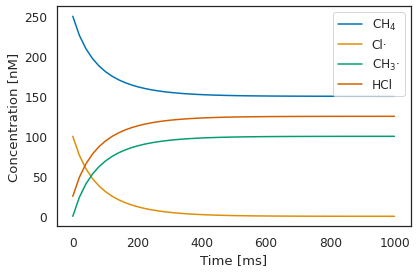

In [5]:
truename = {
    "CH4": "CH$_4$",
    "Cl·": "Cl·",
    "CH3·": "CH$_3$·",
    "HCl": "HCl",
}

t = np.linspace(y.t_min, 1)

fig, ax = plt.subplots()
for i, name in enumerate(model.scheme.compounds):
    if not rx.is_transition_state(name):
    # if name in {"CH3·"}:
        ax.plot(1e3 * t, 1e9 * y(t)[i], label=f"{truename[name]}")

ax.set_ylabel("Concentration [nM]")
ax.set_xlabel("Time [ms]")

# ax.set_yscale("log")
# ax.set_xscale("log")

# ax.legend(loc="lower right")
ax.legend(loc="best")
fig.tight_layout()